In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
At first we need to fit the input pata 
in a fine way, not just a straight line.
Previous algorithm of linear regression 
did not work well enough, so here a 
non-linear regression approach is used
with Gauss-Newton algorithm
'''
#read the input data set
data_path = '/home/wil/Downloads/Homework02_dataset/Task01/case1.txt'

data = pd.read_csv(data_path, header=None)
data.head()

,0,1
0,0.000,269.08
1,0.004,278.50
2,0.008,292.00
3,0.012,280.86
4,0.016,257.84


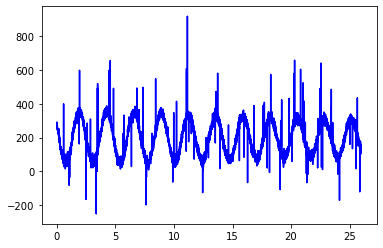

In [7]:
#initializing a data set to comfortable notation
X = data[0]
Y = data[1]

#draw initial plot
plt.plot(X, Y, "b")
plt.show()

In [8]:
#calculating probability parameters for further calculations
mean = np.mean(Y)
sigma = np.std(Y)
lenY = len(Y)


&lt;AxesSubplot:xlabel=&#39;1&#39;&gt;

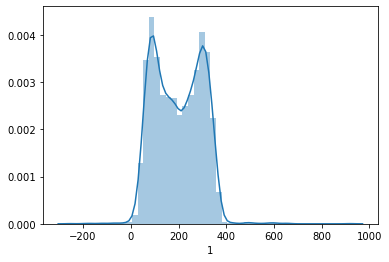

In [9]:
import seaborn as sns

#visual check of an initial data set distribution
sns.distplot(Y)

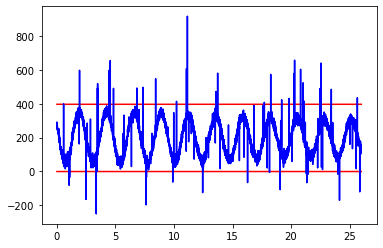

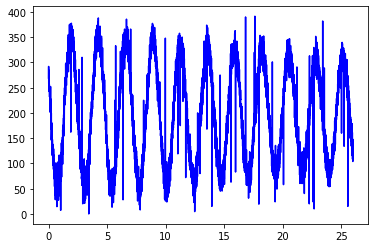

&lt;AxesSubplot:&gt;

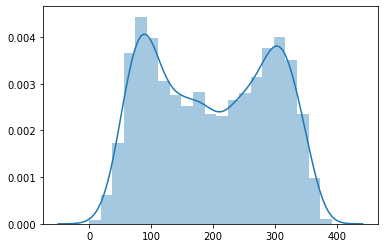

In [10]:
'''
To the regression algorithm work properly
we need to remove outliers
'''

#lower border for inlier points
slow = np.array([mean - 2 * sigma for i in range(len(X))])

#higher border a point to be inlier
shi = np.array([mean + 2 * sigma for i in range(len(X))])

#putting borders on the plot within an initial data set to visualise outliers
plt.plot(X, slow, "r")
plt.plot(X, shi, "r")
plt.plot(X, Y, "b")
plt.show()

#new dataset consisting inliers only
newY = np.array([])
newX = np.array([])

#filling in new data set
for i in range(len(X)):
    if(Y[i] > mean + 2 * sigma) or (Y[i] < mean - 2 * sigma):
        continue
    newY = np.append(newY, Y[i])
    newX = np.append(newX, X[i])

#draw a new dataset
plt.plot(newX, newY, "b")
plt.show()

#visualize a inliers distribution
sns.distplot(newY)

In [11]:
'''
creating symbolic values for 
Newton-Gauss algorithm
'''

from sympy import *

x = symbols('x')
b0 = symbols('b0')
b1 = symbols('b1')
b2 = symbols('b2')
b3 = symbols('b3')
b4 = symbols('b4')
b5 = symbols('b5')

#Damped waves equation with symbolic parameters
y = b0 + b1*x + b2*exp(-b3*x)*cos(b4*x+b5)

#calculate new data set probability parameters
mean = np.mean(newY)
sigma = np.std(newY)

#Derivatives of damped wave equation according to equation parameters 
dydb = np.array([1, x, exp(-b3*x)*(b4*x+b5), -x*b2*exp(-b3*x)*cos(b4*x+b5), -x*b2*exp(-b3*x)*sin(b4*x+b5), -b2*exp(-b3*x)*sin(b4*x+b5)])

'''
dydb0 = 1
dydb1 = x
dydb2 = exp(-b3*x)*(b4*x+b5)
dydb3 = -x*b2*exp(-b3*x)*cos(b4*x+b5)
dydb4 = -x*b2*exp(-b3*x)*sin(b4*x+b5)
dydb5 = -b2*exp(-b3*x)*sin(b4*x+b5)
'''


&#39;\ndydb0 = 1\ndydb1 = x\ndydb2 = exp(-b3*x)*(b4*x+b5)\ndydb3 = -x*b2*exp(-b3*x)*cos(b4*x+b5)\ndydb4 = -x*b2*exp(-b3*x)*sin(b4*x+b5)\ndydb5 = -b2*exp(-b3*x)*sin(b4*x+b5)\n&#39;

196.0 + 158.0*exp(-0.01*x)*cos(2.69*x + 1.27)


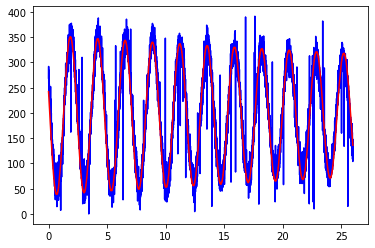

123.12616601979 + 158.619352624709*exp(-0.00996386686936409*x)*cos(2.68984495972784*x + 1.27840506466338)


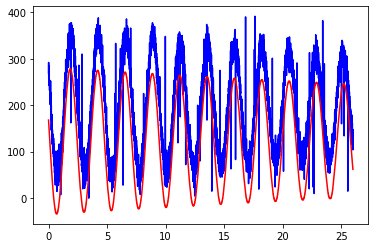

122.567761713856 + 159.244990565211*exp(-0.00992509844880693*x)*cos(2.68970401721979*x + 1.2851670327792)


KeyboardInterrupt: 

In [14]:

from numpy.linalg import inv

'''
non-linear regression

Current initial parameters list 
is based on plenty iterations 
of Newton-Gauss algorithm
'''

#initializing Jacobian matrix
J = np.empty((len(newY), 6))

#initial equation parameters set
initial = np.array([196, 0, 158, 0.01, 2.69, 1.27])

#final equation
myY = 196 + 158 * exp( -0.01 * x) * cos(2.69 * x + 1.27)

residuals = np.array([0 for i in range(len(newX))])

'''
jt = J.transpose()
jtj = np.matmul(jt,J)
negjtj = inv(jtj)
negjtjjt = np.matmul(negjtj, jt)
negjtjjtrb = np.matmul(negjtjjt, residuals)
'''

#a list of guessed equation corresponding points
guess = np.array([0 for i in range(len(newY))])


'''
iterative long loop
do not launch if you care about your time
'''

for k in range(15):
    '''
    visually the plot tends to be
    strictly horizontal, so b1, that 
    is incline coefficient is just
    nulified
    '''
    #ready equation with put all equation parameters
    yy = y.subs(b0, initial[0]).subs(b1, 0).subs(b2, initial[2]).subs(b3, initial[3]).subs(b4, initial[4]).subs(b5, initial[5])

    #iteration equation label
    print(yy)

    #calculating a Jacobian matrix for iterated equation
    for i in range(len(newY)):
        for j in range(6):
            if(j == 0):
                J[i][j] = dydb[j]
            else:
                J[i][j] = dydb[j].subs(b0, initial[0]).subs(b1, initial[1]).subs(b2, initial[2]).subs(b3, initial[3]).subs(b4, initial[4]).subs(b5, initial[5]).subs(x, newY[i])

    #difference between prediction and inlier dataset
    for i in range(len(newX)):
        residuals[i] = newY[i] - yy.subs(x, newX[i])


    #
    jt = J.transpose()
    jtj = np.matmul(jt,J)
    negjtj = inv(jtj)
    negjtjjt = np.matmul(negjtj, jt)
    negjtjjtrb = np.matmul(negjtjjt, residuals)

    #set the next iteration equation parameters list
    initial = initial + negjtjjtrb

    #preparation of prediction plot
    for i in range(len(newY)):
        guess[i] = yy.subs(x, newX[i])
    #to compare with inliers dataset
    plt.plot(newX, newY, "b")
    plt.plot(newX, guess, "r")
    plt.show()

7.505553410642016
80
[0.         0.99561824 0.99134986 ... 0.99134954 0.99134954 0.99134954]


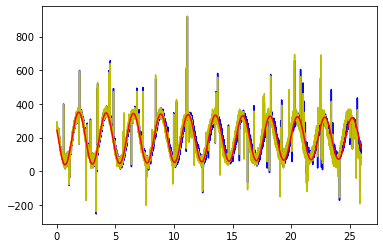

In [54]:
'''
Finally Kalman filter
'''

#prediction equation
myY = 196 + 158 * exp( -0.01 * x) * cos(2.69 * x + 1.27)

#velocity equation
dydx = -158 * exp(-0.01 * x) * (0.01 * cos(2.69 * x + 1.27) + 2.69 * sin(2.69 * x + 1.27))

#initializing numeric list of velocities containing all itaration velocities
v = np.array([])

#initializing numeric list of coordinates according to prediction
myYnum = np.array([])

#initializing a list of optimal coordinates according to Kalman filter
yOpt = np.zeros(lenY)

#initializing a list of Kalman coeffficient
K = np.zeros(lenY)

#initializing an prediction error values
eOpt = np.zeros(lenY)

#setting numeric equations
for i in range(lenY):
    v = np.append(v, dydx.subs(x, X[i]))
    myYnum = np.append(myYnum, myY.subs(x, X[i]))


sigmaksi = 80 
'''
tried sigmaksi values: 0.01, 5, 10,... 10000, 
np.std(myYnum.astype(float)).
when sigmaksi < 10*sigmaeta the plot diverges.
when sigmaksi too high the plot fits a sensor data 
and K becomes 0.999999.
so this is the most appropriate variant, however
i m not satisfied. I expected a smooth plot
'''
sigmaeta = np.std(X)

print(sigmaeta)
print(sigmaksi)

# initial value of optimal cordinates is the first point of original dataset
yOpt[0] = 269.08

# sensor data is our original dataset
z = Y

eOpt[0] = sigmaksi

#Kalman filter loop
for i in range(lenY-1):
    eOpt[i+1] = np.sqrt((sigmaeta**2) * (eOpt[i]**2 + sigmaksi**2) / (sigmaeta**2 + eOpt[i]**2 + sigmaksi**2))
    K[i+1] = eOpt[i+1]**2 / sigmaeta**2
    yOpt[i+1] = (yOpt[i] + v[i] * X[i]) * (1-K[i+1]) + K[i+1] * z[i+1]

print(K)

# plot an iteration optimal coordinates in comparing with sensor values and predicted trajectory
plt.plot(X, Y, "b")
plt.plot(X, xOpt, "y")
plt.plot(X, myYnum, "r")
plt.show()


0.987


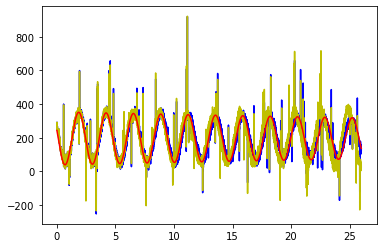

In [62]:
'''
trying with static K
'''

xOpt[0] = 269.08
z = Y
K = 0.99

for i in range(lenY-1):
    xOpt[i+1] = (xOpt[i] + v[i] * X[i]) * (1-K) + K * z[i+1]

plt.plot(X, Y, "b")
plt.plot(X, xOpt, "y")
plt.plot(X, myYnum, "r")
plt.show()

In [ ]:
'''
Therefore, we can see that 
the plot stops its divergence
only when K > 0.99.
So for iterative approach the picture
is more clear, even though looks awful, still.